In [ ]:
# %%

# Use Google Colab
use_google_colab = False
# Process the training dataset
training_data_processing = False
# Train the model
model_training = True
# Validation the model
model_validation = True
# Load the model from your Google Drive or local file system
model_loading = False

import numpy as np
import torch

from util.cuda import cuda
from util.gpu_info import gpuInfo
from util.data_augmentation import training_data_loading, training_data_augmentation
from util.loss import BCEIoULoss
from util.training import train
from util.testing import submission_creating, test

from networks.LinkNetB7 import *
from networks.DLinkNet34 import *
from networks.DLinkNet50 import *
from networks.DLinkNet101 import *
from networks.LinkNet34 import *
from networks.UNet import *


path_training = "./training/"
path_testing = "./test/"
path_data = "./data/"
path_model = "./models/DLinkNet34.model"

cuda_available = torch.cuda.is_available()
if cuda_available:
    print("CUDA is available. Utilize GPUs for computation")
    device = torch.device("cuda")
else:
    print("CUDA is not available. Utilize CPUs for computation.")
    device = torch.device("cpu")

gpu_info = gpuInfo()

model = DLinkNet34()

if cuda_available:
    model.cuda()

print(model)

# The resolution of resized training images and the corresponding masks
training_resize = 512
# The number of resized training pairs used for data augmentation
training_number = 367
# The resolution of resized testing images
testing_resize = int(608 * training_resize / 400)
if testing_resize % 2 == 1:
    testing_resize += 1

if training_data_processing:
    # Load and generate the resized training dataset and validation dataset
    images_training, labels_training, images_validation, labels_validation = (
        training_data_loading(path_training, training_resize, training_number)
    )
    # Generate the augmented training dataset
    rotations = [0, 45, 90, 135]  # the rotation angle

    flips = ["original", np.flipud, np.fliplr]  # 'original', np.flipud, np.fliplr

    shifts = [(-16, 16)]

    images_augmented, labels_augmented = training_data_augmentation(
        images_training, labels_training, rotations, flips, shifts, training_resize
    )
    # Save the augmented training dataset and resized validation dataset
    # to your Google Drive or local file system
    np.save(f"{path_data}images_training", images_augmented)
    np.save(f"{path_data}labels_training", labels_augmented)
    np.save(f"{path_data}images_validation", images_validation)
    np.save(f"{path_data}labels_validation", labels_validation)
elif not model_loading:
    # Load the augmented training dataset and resized validation dataset
    # from your Google Drive or local file system
    images_augmented = np.load(f"{path_data}images_training.npy")
    labels_augmented = np.load(f"{path_data}labels_training.npy")
    images_validation = np.load(f"{path_data}images_validation.npy")
    labels_validation = np.load(f"{path_data}labels_validation.npy")

if model_training:
    print(f"\nimages_training.shape = {images_augmented.shape}")
    print(f"labels_training.shape = {labels_augmented.shape}")
    print(f"images_validation.shape = {images_validation.shape}")
    print(f"labels_validation.shape = {labels_validation.shape}")

CUDA is available. Utilize GPUs for computation
Thu Nov 14 08:29:25 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 555.42.06              Driver Version: 555.42.06      CUDA Version: 12.5     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4080        Off |   00000000:01:00.0  On |                  N/A |
|  0%   41C    P8             14W /  340W |     310MiB /  16376MiB |      9%      Default |
|                                         |                        |                  N/A |


/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wesley/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


DLinkNet34(
  (input_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   

/home/wesley/miniconda3/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
  0%|          | 0/100 [00:00<?, ?it/s]


---------Training for Epoch 1 starting:---------
→ Running_loss for Batch 1: 0.39029398560523987
→ ACC for Batch 1: 0.17409896850585938
→ Recall for Batch 1: 0.8305136345844387
→ Running_loss for Batch 21: 0.3992844820022583
→ ACC for Batch 21: 0.9959449768066406
→ Recall for Batch 21: 0.0
→ Running_loss for Batch 41: 0.3722201883792877
→ ACC for Batch 41: 0.9803028106689453
→ Recall for Batch 41: 0.0
→ Running_loss for Batch 61: 0.30076274275779724
→ ACC for Batch 61: 0.9744224548339844
→ Recall for Batch 61: 0.0
→ Running_loss for Batch 81: 0.29863953590393066
→ ACC for Batch 81: 0.9462013244628906
→ Recall for Batch 81: 0.43783279684726695
→ Running_loss for Batch 101: 0.28482237458229065
→ ACC for Batch 101: 0.9801368713378906
→ Recall for Batch 101: 0.45515474078454565
→ Running_loss for Batch 121: 0.3012947738170624
→ ACC for Batch 121: 0.9578266143798828
→ Recall for Batch 121: 0.42221943887775554
→ Running_loss for Batch 141: 0.2442629039287567
→ ACC for Batch 141: 0.971044540

  1%|          | 1/100 [06:05<10:03:14, 365.61s/it]


---------Training for Epoch 2 starting:---------
→ Running_loss for Batch 1: 0.2618032693862915
→ ACC for Batch 1: 0.9799480438232422
→ Recall for Batch 1: 0.7767119637623234
→ Running_loss for Batch 21: 0.16202224791049957
→ ACC for Batch 21: 0.9828376770019531
→ Recall for Batch 21: 0.7826445307900624
→ Running_loss for Batch 41: 0.16814255714416504
→ ACC for Batch 41: 0.9675445556640625
→ Recall for Batch 41: 0.8313878978906168
→ Running_loss for Batch 61: 0.19154752790927887
→ ACC for Batch 61: 0.9846153259277344
→ Recall for Batch 61: 0.6884069277578405
→ Running_loss for Batch 81: 0.1782604157924652
→ ACC for Batch 81: 0.9804649353027344
→ Recall for Batch 81: 0.7717339097022095
→ Running_loss for Batch 101: 0.18187081813812256
→ ACC for Batch 101: 0.9831924438476562
→ Recall for Batch 101: 0.7512833134097462
→ Running_loss for Batch 121: 0.2603960633277893
→ ACC for Batch 121: 0.9681415557861328
→ Recall for Batch 121: 0.48637210942616754
→ Running_loss for Batch 141: 0.2053645

  2%|▏         | 2/100 [11:10<8:59:03, 330.04s/it] 


---------Training for Epoch 3 starting:---------
→ Running_loss for Batch 1: 0.16523940861225128
→ ACC for Batch 1: 0.9958209991455078
→ Recall for Batch 1: 0.7267253358036128
→ Running_loss for Batch 21: 0.16130954027175903
→ ACC for Batch 21: 0.9657382965087891
→ Recall for Batch 21: 0.6964052371313638
→ Running_loss for Batch 41: 0.16591836512088776
→ ACC for Batch 41: 0.9832324981689453
→ Recall for Batch 41: 0.6713320463320464
→ Running_loss for Batch 61: 0.19997374713420868
→ ACC for Batch 61: 0.9866466522216797
→ Recall for Batch 61: 0.8484157465194431
→ Running_loss for Batch 81: 0.18804727494716644
→ ACC for Batch 81: 0.9950580596923828
→ Recall for Batch 81: 0.5748763600395648
→ Running_loss for Batch 101: 0.22029657661914825
→ ACC for Batch 101: 0.9831142425537109
→ Recall for Batch 101: 0.578838174273859
→ Running_loss for Batch 121: 0.1443958729505539
→ ACC for Batch 121: 0.9799594879150391
→ Recall for Batch 121: 0.7232709268141729
→ Running_loss for Batch 141: 0.1756268

  3%|▎         | 3/100 [16:33<8:47:59, 326.59s/it]


---------Training for Epoch 4 starting:---------
→ Running_loss for Batch 1: 0.14752338826656342
→ ACC for Batch 1: 0.9902248382568359
→ Recall for Batch 1: 0.7643284487990982
→ Running_loss for Batch 21: 0.1325044333934784
→ ACC for Batch 21: 0.9864540100097656
→ Recall for Batch 21: 0.8433742007391329
→ Running_loss for Batch 41: 0.1292032152414322
→ ACC for Batch 41: 0.9885883331298828
→ Recall for Batch 41: 0.7616405307599518
→ Running_loss for Batch 61: 0.20157676935195923
→ ACC for Batch 61: 0.9668388366699219
→ Recall for Batch 61: 0.7668968091061765
→ Running_loss for Batch 81: 0.10419946163892746
→ ACC for Batch 81: 0.9931678771972656
→ Recall for Batch 81: 0.8563079235200801
→ Running_loss for Batch 101: 0.14435793459415436
→ ACC for Batch 101: 0.9723377227783203
→ Recall for Batch 101: 0.7659155095316545
→ Running_loss for Batch 121: 0.1370852142572403
→ ACC for Batch 121: 0.9917678833007812
→ Recall for Batch 121: 0.8130456105934282
→ Running_loss for Batch 141: 0.14483901

  4%|▍         | 4/100 [22:20<8:55:19, 334.58s/it]


---------Training for Epoch 5 starting:---------
→ Running_loss for Batch 1: 0.16031447052955627
→ ACC for Batch 1: 0.9785499572753906
→ Recall for Batch 1: 0.8264134489608062
→ Running_loss for Batch 21: 0.17966291308403015
→ ACC for Batch 21: 0.9797191619873047
→ Recall for Batch 21: 0.8656618610747051
→ Running_loss for Batch 41: 0.11934951692819595
→ ACC for Batch 41: 0.996978759765625
→ Recall for Batch 41: 0.8584579976985041
→ Running_loss for Batch 61: 0.0975230485200882
→ ACC for Batch 61: 0.9925289154052734
→ Recall for Batch 61: 0.8879777419827207
→ Running_loss for Batch 81: 0.11526423692703247
→ ACC for Batch 81: 0.9931526184082031
→ Recall for Batch 81: 0.8644461657629744
→ Running_loss for Batch 101: 0.19301125407218933
→ ACC for Batch 101: 0.9830780029296875
→ Recall for Batch 101: 0.6801251066249645
→ Running_loss for Batch 121: 0.13439714908599854
→ ACC for Batch 121: 0.9870204925537109
→ Recall for Batch 121: 0.8164189923885465
→ Running_loss for Batch 141: 0.1126634

  5%|▌         | 5/100 [28:00<8:52:54, 336.57s/it]


---------Training for Epoch 6 starting:---------
→ Running_loss for Batch 1: 0.15375980734825134
→ ACC for Batch 1: 0.9873161315917969
→ Recall for Batch 1: 0.7503514197357324
→ Running_loss for Batch 21: 0.1533079743385315
→ ACC for Batch 21: 0.9719791412353516
→ Recall for Batch 21: 0.7895225464190981
→ Running_loss for Batch 41: 0.1177421435713768
→ ACC for Batch 41: 0.9868450164794922
→ Recall for Batch 41: 0.8036326747500121
→ Running_loss for Batch 61: 0.11614558845758438
→ ACC for Batch 61: 0.9857997894287109
→ Recall for Batch 61: 0.8437731310140637
→ Running_loss for Batch 81: 0.14495877921581268
→ ACC for Batch 81: 0.9877223968505859
→ Recall for Batch 81: 0.7621861152141802
→ Running_loss for Batch 101: 0.1555064171552658
→ ACC for Batch 101: 0.9573879241943359
→ Recall for Batch 101: 0.7321360566033954
→ Running_loss for Batch 121: 0.1865820437669754
→ ACC for Batch 121: 0.9938526153564453
→ Recall for Batch 121: 0.6893601190476191
→ Running_loss for Batch 141: 0.165881901

  6%|▌         | 6/100 [33:39<8:48:42, 337.47s/it]


---------Training for Epoch 7 starting:---------
→ Running_loss for Batch 1: 0.17695683240890503
→ ACC for Batch 1: 0.9664764404296875
→ Recall for Batch 1: 0.7598536127214431
→ Running_loss for Batch 21: 0.12202569842338562
→ ACC for Batch 21: 0.9966850280761719
→ Recall for Batch 21: 0.7962703027872469
→ Running_loss for Batch 41: 0.11720805615186691
→ ACC for Batch 41: 0.9873275756835938
→ Recall for Batch 41: 0.837509768168794
→ Running_loss for Batch 61: 0.12227781116962433
→ ACC for Batch 61: 0.9835109710693359
→ Recall for Batch 61: 0.7915195763799743
→ Running_loss for Batch 81: 0.11730967462062836
→ ACC for Batch 81: 0.9834098815917969
→ Recall for Batch 81: 0.9169410745233969
→ Running_loss for Batch 101: 0.10775458067655563
→ ACC for Batch 101: 0.9925746917724609
→ Recall for Batch 101: 0.8372720063441713
→ Running_loss for Batch 121: 0.14612480998039246
→ ACC for Batch 121: 0.9962291717529297
→ Recall for Batch 121: 0.7701278313523211
→ Running_loss for Batch 141: 0.139624

  7%|▋         | 7/100 [39:20<8:44:59, 338.71s/it]


---------Training for Epoch 8 starting:---------
→ Running_loss for Batch 1: 0.17063766717910767
→ ACC for Batch 1: 0.9721336364746094
→ Recall for Batch 1: 0.7364730198567948
→ Running_loss for Batch 21: 0.17319843173027039
→ ACC for Batch 21: 0.9711189270019531
→ Recall for Batch 21: 0.7859016767423291
→ Running_loss for Batch 41: 0.10873029381036758
→ ACC for Batch 41: 0.9939250946044922
→ Recall for Batch 41: 0.8640413039076736
→ Running_loss for Batch 61: 0.1134844720363617
→ ACC for Batch 61: 0.9953727722167969
→ Recall for Batch 61: 0.8547671840354767
→ Running_loss for Batch 81: 0.12346212565898895
→ ACC for Batch 81: 0.9921684265136719
→ Recall for Batch 81: 0.7994978789715176
→ Running_loss for Batch 101: 0.13472777605056763
→ ACC for Batch 101: 0.9921207427978516
→ Recall for Batch 101: 0.835232522328303
→ Running_loss for Batch 121: 0.11331070959568024
→ ACC for Batch 121: 0.9924869537353516
→ Recall for Batch 121: 0.84751231108847
→ Running_loss for Batch 141: 0.124171473

  8%|▊         | 8/100 [45:02<8:40:40, 339.57s/it]


---------Training for Epoch 9 starting:---------
→ Running_loss for Batch 1: 0.1093280091881752
→ ACC for Batch 1: 0.9938259124755859
→ Recall for Batch 1: 0.8750126607920592
→ Running_loss for Batch 21: 0.09416632354259491
→ ACC for Batch 21: 0.9948101043701172
→ Recall for Batch 21: 0.8834883488348835
→ Running_loss for Batch 41: 0.12686441838741302
→ ACC for Batch 41: 0.9912357330322266
→ Recall for Batch 41: 0.8959500994395226
→ Running_loss for Batch 61: 0.10673336684703827
→ ACC for Batch 61: 0.9901008605957031
→ Recall for Batch 61: 0.9119292890754165
→ Running_loss for Batch 81: 0.09404128044843674
→ ACC for Batch 81: 0.9924945831298828
→ Recall for Batch 81: 0.8870578500999793
→ Running_loss for Batch 101: 0.11521431803703308
→ ACC for Batch 101: 0.9894161224365234
→ Recall for Batch 101: 0.8445181907571289
→ Running_loss for Batch 121: 0.12744805216789246
→ ACC for Batch 121: 0.9762916564941406
→ Recall for Batch 121: 0.8383087684236823
→ Running_loss for Batch 141: 0.124353

  9%|▉         | 9/100 [50:57<8:42:30, 344.51s/it]


---------Training for Epoch 10 starting:---------
→ Running_loss for Batch 1: 0.08410630375146866
→ ACC for Batch 1: 0.9898643493652344
→ Recall for Batch 1: 0.8858445467422096
→ Running_loss for Batch 21: 0.10192131996154785
→ ACC for Batch 21: 0.9934139251708984
→ Recall for Batch 21: 0.8200472274244769
→ Running_loss for Batch 41: 0.13678355515003204
→ ACC for Batch 41: 0.9878292083740234
→ Recall for Batch 41: 0.8048621095281663
→ Running_loss for Batch 61: 0.12594115734100342
→ ACC for Batch 61: 0.9908943176269531
→ Recall for Batch 61: 0.8228147680656358
→ Running_loss for Batch 81: 0.09662256389856339
→ ACC for Batch 81: 0.9943828582763672
→ Recall for Batch 81: 0.8953926398145465
→ Running_loss for Batch 101: 0.14155268669128418
→ ACC for Batch 101: 0.9827022552490234
→ Recall for Batch 101: 0.7938690731986822
→ Running_loss for Batch 121: 0.1130172535777092
→ ACC for Batch 121: 0.9801826477050781
→ Recall for Batch 121: 0.801697741397605
→ Running_loss for Batch 141: 0.144091

 10%|█         | 10/100 [56:26<8:29:34, 339.72s/it]


---------Training for Epoch 11 starting:---------
→ Running_loss for Batch 1: 0.13033483922481537
→ ACC for Batch 1: 0.9774971008300781
→ Recall for Batch 1: 0.845983963033433
→ Running_loss for Batch 21: 0.11069158464670181
→ ACC for Batch 21: 0.9938583374023438
→ Recall for Batch 21: 0.8714921818370094
→ Running_loss for Batch 41: 0.08374187350273132
→ ACC for Batch 41: 0.9861946105957031
→ Recall for Batch 41: 0.8888097627294209
→ Running_loss for Batch 61: 0.1097307875752449
→ ACC for Batch 61: 0.9895572662353516
→ Recall for Batch 61: 0.89607504319921
→ Running_loss for Batch 81: 0.11398345232009888
→ ACC for Batch 81: 0.9810504913330078
→ Recall for Batch 81: 0.8492965367965368
→ Running_loss for Batch 101: 0.10584219545125961
→ ACC for Batch 101: 0.9901866912841797
→ Recall for Batch 101: 0.8666707051126726
→ Running_loss for Batch 121: 0.1089286208152771
→ ACC for Batch 121: 0.9820671081542969
→ Recall for Batch 121: 0.8590932246561386
→ Running_loss for Batch 141: 0.103307642

 11%|█         | 11/100 [1:02:00<8:21:28, 338.07s/it]


---------Training for Epoch 12 starting:---------
→ Running_loss for Batch 1: 0.07610000669956207
→ ACC for Batch 1: 0.9920845031738281
→ Recall for Batch 1: 0.925491422910475
→ Running_loss for Batch 21: 0.11413437128067017
→ ACC for Batch 21: 0.9885387420654297
→ Recall for Batch 21: 0.8287505499340079
→ Running_loss for Batch 41: 0.10593105852603912
→ ACC for Batch 41: 0.9905166625976562
→ Recall for Batch 41: 0.8609160400223728
→ Running_loss for Batch 61: 0.09182838350534439
→ ACC for Batch 61: 0.9843540191650391
→ Recall for Batch 61: 0.859529067778158
→ Running_loss for Batch 81: 0.12116166949272156
→ ACC for Batch 81: 0.9889678955078125
→ Recall for Batch 81: 0.8527912312006117
→ Running_loss for Batch 101: 0.13096965849399567
→ ACC for Batch 101: 0.9942035675048828
→ Recall for Batch 101: 0.7934755013962935
→ Running_loss for Batch 121: 0.08740560710430145
→ ACC for Batch 121: 0.9915485382080078
→ Recall for Batch 121: 0.8800266237728105
→ Running_loss for Batch 141: 0.106421

 12%|█▏        | 12/100 [1:07:12<8:04:07, 330.09s/it]


---------Training for Epoch 13 starting:---------
→ Running_loss for Batch 1: 0.10423226654529572
→ ACC for Batch 1: 0.9931087493896484
→ Recall for Batch 1: 0.861220390056081
→ Running_loss for Batch 21: 0.09643203765153885
→ ACC for Batch 21: 0.9929485321044922
→ Recall for Batch 21: 0.8587229022268102
→ Running_loss for Batch 41: 0.08744096755981445
→ ACC for Batch 41: 0.9854660034179688
→ Recall for Batch 41: 0.874583866837388
→ Running_loss for Batch 61: 0.06629552692174911
→ ACC for Batch 61: 0.9904670715332031
→ Recall for Batch 61: 0.9117880890430761
→ Running_loss for Batch 81: 0.10379645228385925
→ ACC for Batch 81: 0.9741363525390625
→ Recall for Batch 81: 0.8441837690539045
→ Running_loss for Batch 101: 0.07172289490699768
→ ACC for Batch 101: 0.9945468902587891
→ Recall for Batch 101: 0.8922554347826087
→ Running_loss for Batch 121: 0.12155881524085999
→ ACC for Batch 121: 0.9932212829589844
→ Recall for Batch 121: 0.8527696793002916
→ Running_loss for Batch 141: 0.087756

 13%|█▎        | 13/100 [1:12:53<8:03:14, 333.27s/it]


---------Training for Epoch 14 starting:---------
→ Running_loss for Batch 1: 0.12773579359054565
→ ACC for Batch 1: 0.9942970275878906
→ Recall for Batch 1: 0.8172166794576619
→ Running_loss for Batch 21: 0.09181353449821472
→ ACC for Batch 21: 0.9907588958740234
→ Recall for Batch 21: 0.8906318320944469
→ Running_loss for Batch 41: 0.1525132656097412
→ ACC for Batch 41: 0.9855003356933594
→ Recall for Batch 41: 0.8056826235422976
→ Running_loss for Batch 61: 0.10361970216035843
→ ACC for Batch 61: 0.9940814971923828
→ Recall for Batch 61: 0.8851169736187158
→ Running_loss for Batch 81: 0.2172481268644333
→ ACC for Batch 81: 0.9977817535400391
→ Recall for Batch 81: 0.5195353748680043
→ Running_loss for Batch 101: 0.1074301078915596
→ ACC for Batch 101: 0.9815044403076172
→ Recall for Batch 101: 0.8575709728353688
→ Running_loss for Batch 121: 0.10796143859624863
→ ACC for Batch 121: 0.9891471862792969
→ Recall for Batch 121: 0.8591424127971562
→ Running_loss for Batch 141: 0.1163571

 14%|█▍        | 14/100 [1:18:24<7:56:58, 332.77s/it]


---------Training for Epoch 15 starting:---------
→ Running_loss for Batch 1: 0.08466563373804092
→ ACC for Batch 1: 0.9955177307128906
→ Recall for Batch 1: 0.885366344605475
→ Running_loss for Batch 21: 0.08188164234161377
→ ACC for Batch 21: 0.9928398132324219
→ Recall for Batch 21: 0.8994770839741618
→ Running_loss for Batch 41: 0.11941344290971756
→ ACC for Batch 41: 0.9917793273925781
→ Recall for Batch 41: 0.8367734478203435
→ Running_loss for Batch 61: 0.07742547243833542
→ ACC for Batch 61: 0.9942874908447266
→ Recall for Batch 61: 0.9074810263823636
→ Running_loss for Batch 81: 0.09671344608068466
→ ACC for Batch 81: 0.9922523498535156
→ Recall for Batch 81: 0.8711171662125341
→ Running_loss for Batch 101: 0.11064744740724564
→ ACC for Batch 101: 0.9893665313720703
→ Recall for Batch 101: 0.8597016678412027
→ Running_loss for Batch 121: 0.1142299547791481
→ ACC for Batch 121: 0.9798355102539062
→ Recall for Batch 121: 0.8530008882121558
→ Running_loss for Batch 141: 0.085693

 15%|█▌        | 15/100 [1:23:45<7:46:09, 329.05s/it]


---------Training for Epoch 16 starting:---------
→ Running_loss for Batch 1: 0.07749763876199722
→ ACC for Batch 1: 0.9874305725097656
→ Recall for Batch 1: 0.8977128128160788
→ Running_loss for Batch 21: 0.10336986929178238
→ ACC for Batch 21: 0.9884834289550781
→ Recall for Batch 21: 0.8472404890642505
→ Running_loss for Batch 41: 0.10364034026861191
→ ACC for Batch 41: 0.9979267120361328
→ Recall for Batch 41: 0.9121779859484778
→ Running_loss for Batch 61: 0.09214909374713898
→ ACC for Batch 61: 0.9947376251220703
→ Recall for Batch 61: 0.9342741935483871
→ Running_loss for Batch 81: 0.10465271025896072
→ ACC for Batch 81: 0.9821949005126953
→ Recall for Batch 81: 0.8660505076802916
→ Running_loss for Batch 101: 0.10028468817472458
→ ACC for Batch 101: 0.9880084991455078
→ Recall for Batch 101: 0.8517529970594888
→ Running_loss for Batch 121: 0.062412381172180176
→ ACC for Batch 121: 0.9946804046630859
→ Recall for Batch 121: 0.9226782120861028
→ Running_loss for Batch 141: 0.111

 16%|█▌        | 16/100 [1:29:14<7:40:57, 329.26s/it]


---------Training for Epoch 17 starting:---------
→ Running_loss for Batch 1: 0.11537186056375504
→ ACC for Batch 1: 0.9933547973632812
→ Recall for Batch 1: 0.8054879190859712
→ Running_loss for Batch 21: 0.066041499376297
→ ACC for Batch 21: 0.9954490661621094
→ Recall for Batch 21: 0.9089062735068452
→ Running_loss for Batch 41: 0.07653837651014328
→ ACC for Batch 41: 0.9854888916015625
→ Recall for Batch 41: 0.9147140195358816
→ Running_loss for Batch 61: 0.11351045966148376
→ ACC for Batch 61: 0.9959163665771484
→ Recall for Batch 61: 0.8519509125235998
→ Running_loss for Batch 81: 0.11364804208278656
→ ACC for Batch 81: 0.9976367950439453
→ Recall for Batch 81: 0.8645573133499861
→ Running_loss for Batch 101: 0.09343025088310242
→ ACC for Batch 101: 0.9901084899902344
→ Recall for Batch 101: 0.8741823385118561
→ Running_loss for Batch 121: 0.10362082719802856
→ ACC for Batch 121: 0.9845676422119141
→ Recall for Batch 121: 0.8634057836857111
→ Running_loss for Batch 141: 0.094342

 17%|█▋        | 17/100 [1:34:59<7:41:55, 333.93s/it]

Validation loss for Epoch 17: 0.1194998174905777

Acurácia de validação:  0.9888295977055526
F1-score de validação:  0.7699003351478111
IoU de validação:  0.979979932194735
Recall de validação:  0.783193782084718

---------Training for Epoch 18 starting:---------
→ Running_loss for Batch 1: 0.07933037728071213
→ ACC for Batch 1: 0.9958419799804688
→ Recall for Batch 1: 0.9131955157873084
→ Running_loss for Batch 21: 0.08023710548877716
→ ACC for Batch 21: 0.9992790222167969
→ Recall for Batch 21: 0.9155099577549789
→ Running_loss for Batch 41: 0.10873287171125412
→ ACC for Batch 41: 0.9821929931640625
→ Recall for Batch 41: 0.8667989327495382
→ Running_loss for Batch 61: 0.09580861777067184
→ ACC for Batch 61: 0.9937820434570312
→ Recall for Batch 61: 0.8489468076387181
→ Running_loss for Batch 81: 0.07786554098129272
→ ACC for Batch 81: 0.9933795928955078
→ Recall for Batch 81: 0.8873680333906212
→ Running_loss for Batch 101: 0.11186570674180984
→ ACC for Batch 101: 0.9935798645019531

 18%|█▊        | 18/100 [1:40:34<7:36:48, 334.26s/it]


---------Training for Epoch 19 starting:---------
→ Running_loss for Batch 1: 0.10559014976024628
→ ACC for Batch 1: 0.9911460876464844
→ Recall for Batch 1: 0.8479383127491341
→ Running_loss for Batch 21: 0.07787540555000305
→ ACC for Batch 21: 0.9895896911621094
→ Recall for Batch 21: 0.891044776119403
→ Running_loss for Batch 41: 0.0705237090587616
→ ACC for Batch 41: 0.9950523376464844
→ Recall for Batch 41: 0.8983811626195732
→ Running_loss for Batch 61: 0.08760765939950943
→ ACC for Batch 61: 0.9923381805419922
→ Recall for Batch 61: 0.9092524432034522
→ Running_loss for Batch 81: 0.09244351089000702
→ ACC for Batch 81: 0.9904270172119141
→ Recall for Batch 81: 0.8739701741578892
→ Running_loss for Batch 101: 0.08988045156002045
→ ACC for Batch 101: 0.9910354614257812
→ Recall for Batch 101: 0.8918117414465374
→ Running_loss for Batch 121: 0.07604563981294632
→ ACC for Batch 121: 0.996246337890625
→ Recall for Batch 121: 0.912639204238296
→ Running_loss for Batch 141: 0.08028095

 19%|█▉        | 19/100 [1:46:11<7:32:10, 334.95s/it]

Validation loss for Epoch 19: 0.11671936511993408

Acurácia de validação:  0.9891215535931122
F1-score de validação:  0.7761002626670308
IoU de validação:  0.9804604568982767
Recall de validação:  0.7896251163593616

---------Training for Epoch 20 starting:---------
→ Running_loss for Batch 1: 0.0910770446062088
→ ACC for Batch 1: 0.992584228515625
→ Recall for Batch 1: 0.8900100908173562
→ Running_loss for Batch 21: 0.08757416158914566
→ ACC for Batch 21: 0.9917278289794922
→ Recall for Batch 21: 0.8898484415213039
→ Running_loss for Batch 41: 0.09183460474014282
→ ACC for Batch 41: 0.9912052154541016
→ Recall for Batch 41: 0.8879675168706394
→ Running_loss for Batch 61: 0.09024565666913986
→ ACC for Batch 61: 0.9941749572753906
→ Recall for Batch 61: 0.8837366157996797
→ Running_loss for Batch 81: 0.08106020092964172
→ ACC for Batch 81: 0.9935417175292969
→ Recall for Batch 81: 0.9048971861471862
→ Running_loss for Batch 101: 0.07054828107357025
→ ACC for Batch 101: 0.986351013183593

 20%|██        | 20/100 [1:51:29<7:20:03, 330.04s/it]

Validation loss for Epoch 20: 0.11690232157707214

Acurácia de validação:  0.989249392066683
F1-score de validação:  0.7787110532023137
IoU de validação:  0.980669905521851
Recall de validação:  0.7923709448116323

---------Training for Epoch 21 starting:---------
→ Running_loss for Batch 1: 0.0962454155087471
→ ACC for Batch 1: 0.9957542419433594
→ Recall for Batch 1: 0.8856423173803526
→ Running_loss for Batch 21: 0.09026894718408585
→ ACC for Batch 21: 0.9908199310302734
→ Recall for Batch 21: 0.8937991172354398
→ Running_loss for Batch 41: 0.07230949401855469
→ ACC for Batch 41: 0.99267578125
→ Recall for Batch 41: 0.9273574416265156
→ Running_loss for Batch 61: 0.06342653185129166
→ ACC for Batch 61: 0.9939041137695312
→ Recall for Batch 61: 0.9350065760631302
→ Running_loss for Batch 81: 0.09342067688703537
→ ACC for Batch 81: 0.9895687103271484
→ Recall for Batch 81: 0.8912024473281689
→ Running_loss for Batch 101: 0.08991613239049911
→ ACC for Batch 101: 0.9915122985839844
→ Re

 21%|██        | 21/100 [1:56:44<7:08:21, 325.33s/it]


---------Training for Epoch 22 starting:---------
→ Running_loss for Batch 1: 0.09375359117984772
→ ACC for Batch 1: 0.9939403533935547
→ Recall for Batch 1: 0.8698996655518395
→ Running_loss for Batch 21: 0.08707863092422485
→ ACC for Batch 21: 0.9918575286865234
→ Recall for Batch 21: 0.8992948307010898
→ Running_loss for Batch 41: 0.10432069003582001
→ ACC for Batch 41: 0.9946098327636719
→ Recall for Batch 41: 0.8602208168078036
→ Running_loss for Batch 61: 0.08845816552639008
→ ACC for Batch 61: 0.9903888702392578
→ Recall for Batch 61: 0.8824490199960404
→ Running_loss for Batch 81: 0.09319567680358887
→ ACC for Batch 81: 0.9992885589599609
→ Recall for Batch 81: 0.8628005657708628
→ Running_loss for Batch 101: 0.10900028795003891
→ ACC for Batch 101: 0.9951286315917969
→ Recall for Batch 101: 0.8328271169967197
→ Running_loss for Batch 121: 0.10214319825172424
→ ACC for Batch 121: 0.991943359375
→ Recall for Batch 121: 0.8671793079342887
→ Running_loss for Batch 141: 0.10266027

 22%|██▏       | 22/100 [2:02:02<7:00:17, 323.30s/it]

Validation loss for Epoch 22: 0.11447034776210785

Acurácia de validação:  0.9894850524989042
F1-score de validação:  0.7836153951297611
IoU de validação:  0.9810586644772429
Recall de validação:  0.7973254985078321

---------Training for Epoch 23 starting:---------
→ Running_loss for Batch 1: 0.08420515060424805
→ ACC for Batch 1: 0.9956989288330078
→ Recall for Batch 1: 0.9065291365376436
→ Running_loss for Batch 21: 0.08320561051368713
→ ACC for Batch 21: 0.9844837188720703
→ Recall for Batch 21: 0.8835826782745894
→ Running_loss for Batch 41: 0.0689302384853363
→ ACC for Batch 41: 0.9951095581054688
→ Recall for Batch 41: 0.9097206868597538
→ Running_loss for Batch 61: 0.07787427306175232
→ ACC for Batch 61: 0.9911766052246094
→ Recall for Batch 61: 0.8918981588832723
→ Running_loss for Batch 81: 0.08853179961442947
→ ACC for Batch 81: 0.9946670532226562
→ Recall for Batch 81: 0.8669543013119662
→ Running_loss for Batch 101: 0.057154737412929535
→ ACC for Batch 101: 0.9953498840332

 23%|██▎       | 23/100 [2:07:35<6:58:40, 326.24s/it]


---------Training for Epoch 24 starting:---------
→ Running_loss for Batch 1: 0.09647716581821442
→ ACC for Batch 1: 0.9958057403564453
→ Recall for Batch 1: 0.8647841771364597
→ Running_loss for Batch 21: 0.0816592425107956
→ ACC for Batch 21: 0.9920730590820312
→ Recall for Batch 21: 0.8729927793943313
→ Running_loss for Batch 41: 0.10494862496852875
→ ACC for Batch 41: 0.9837207794189453
→ Recall for Batch 41: 0.8617514784517866
→ Running_loss for Batch 61: 0.09196247160434723
→ ACC for Batch 61: 0.9961814880371094
→ Recall for Batch 61: 0.8813581541688515
→ Running_loss for Batch 81: 0.09634917974472046
→ ACC for Batch 81: 0.9908981323242188
→ Recall for Batch 81: 0.8584696028716312
→ Running_loss for Batch 101: 0.09440932422876358
→ ACC for Batch 101: 0.9990463256835938
→ Recall for Batch 101: 0.8620326487625066
→ Running_loss for Batch 121: 0.07272250205278397
→ ACC for Batch 121: 0.9884967803955078
→ Recall for Batch 121: 0.9147224991691592
→ Running_loss for Batch 141: 0.10627

 24%|██▍       | 24/100 [2:12:46<6:47:12, 321.49s/it]

Validation loss for Epoch 24: 0.11497244983911514

Acurácia de validação:  0.9896865586439768
F1-score de validação:  0.7878267256747223
IoU de validação:  0.9813903411543737
Recall de validação:  0.8014149317662878

---------Training for Epoch 25 starting:---------
→ Running_loss for Batch 1: 0.10418055951595306
→ ACC for Batch 1: 0.9884796142578125
→ Recall for Batch 1: 0.8645374449339207
→ Running_loss for Batch 21: 0.09939485043287277
→ ACC for Batch 21: 0.9845638275146484
→ Recall for Batch 21: 0.9048075898091887
→ Running_loss for Batch 41: 0.06554194539785385
→ ACC for Batch 41: 0.9964542388916016
→ Recall for Batch 41: 0.9246555544850178
→ Running_loss for Batch 61: 0.08955152332782745
→ ACC for Batch 61: 0.9925060272216797
→ Recall for Batch 61: 0.876293297345929
→ Running_loss for Batch 81: 0.09147415310144424
→ ACC for Batch 81: 0.9936847686767578
→ Recall for Batch 81: 0.9120656057161416
→ Running_loss for Batch 101: 0.07913278788328171
→ ACC for Batch 101: 0.99181938171386

 25%|██▌       | 25/100 [2:18:37<6:52:55, 330.34s/it]

Validation loss for Epoch 25: 0.11301781982183456

Acurácia de validação:  0.9897715098517281
F1-score de validação:  0.7897627839898586
IoU de validação:  0.9815325445678562
Recall de validação:  0.8037268827653372

---------Training for Epoch 26 starting:---------
→ Running_loss for Batch 1: 0.07205419987440109
→ ACC for Batch 1: 0.9907493591308594
→ Recall for Batch 1: 0.9023382096689225
→ Running_loss for Batch 21: 0.07227813452482224
→ ACC for Batch 21: 0.9942436218261719
→ Recall for Batch 21: 0.9027915264304098
→ Running_loss for Batch 41: 0.1092463955283165
→ ACC for Batch 41: 0.9880790710449219
→ Recall for Batch 41: 0.840938657059942
→ Running_loss for Batch 61: 0.07946653664112091
→ ACC for Batch 61: 0.9956302642822266
→ Recall for Batch 61: 0.9069402179248062
→ Running_loss for Batch 81: 0.11721781641244888
→ ACC for Batch 81: 0.9974040985107422
→ Recall for Batch 81: 0.8414882772680938
→ Running_loss for Batch 101: 0.0910857543349266
→ ACC for Batch 101: 0.9962863922119141

 26%|██▌       | 26/100 [2:24:26<6:54:25, 336.02s/it]

Validation loss for Epoch 26: 0.11194254457950592

Acurácia de validação:  0.9898578007142622
F1-score de validação:  0.7915528217962751
IoU de validação:  0.9816742713822848
Recall de validação:  0.8053885041918429

---------Training for Epoch 27 starting:---------
→ Running_loss for Batch 1: 0.08321850746870041
→ ACC for Batch 1: 0.9949836730957031
→ Recall for Batch 1: 0.8943241557515815
→ Running_loss for Batch 21: 0.06935504078865051
→ ACC for Batch 21: 0.9953079223632812
→ Recall for Batch 21: 0.9140253874308855
→ Running_loss for Batch 41: 0.10075362026691437
→ ACC for Batch 41: 0.9989566802978516
→ Recall for Batch 41: 0.8693090519550081
→ Running_loss for Batch 61: 0.07976384460926056
→ ACC for Batch 61: 0.9963397979736328
→ Recall for Batch 61: 0.8890429958391124
→ Running_loss for Batch 81: 0.05922732874751091
→ ACC for Batch 81: 0.9959869384765625
→ Recall for Batch 81: 0.9263456090651558
→ Running_loss for Batch 101: 0.1156512051820755
→ ACC for Batch 101: 0.99515724182128

 27%|██▋       | 27/100 [2:30:00<6:48:05, 335.42s/it]

Validation loss for Epoch 27: 0.1127479299902916

Acurácia de validação:  0.9899371225367147
F1-score de validação:  0.7931698346455418
IoU de validação:  0.9818056917282695
Recall de validação:  0.807034607605533

---------Training for Epoch 28 starting:---------
→ Running_loss for Batch 1: 0.10361064225435257
→ ACC for Batch 1: 0.9931144714355469
→ Recall for Batch 1: 0.8566231189019349
→ Running_loss for Batch 21: 0.07637263834476471
→ ACC for Batch 21: 0.9836921691894531
→ Recall for Batch 21: 0.8958666472840044
→ Running_loss for Batch 41: 0.071713387966156
→ ACC for Batch 41: 0.9931240081787109
→ Recall for Batch 41: 0.9113937992180187
→ Running_loss for Batch 61: 0.08356121182441711
→ ACC for Batch 61: 0.9931392669677734
→ Recall for Batch 61: 0.8864240773172471
→ Running_loss for Batch 81: 0.057506054639816284
→ ACC for Batch 81: 0.9964847564697266
→ Recall for Batch 81: 0.9188490408673895
→ Running_loss for Batch 101: 0.0489177331328392
→ ACC for Batch 101: 0.9963512420654297


 28%|██▊       | 28/100 [2:35:39<6:43:35, 336.33s/it]


---------Training for Epoch 29 starting:---------
→ Running_loss for Batch 1: 0.09989579021930695
→ ACC for Batch 1: 0.9854011535644531
→ Recall for Batch 1: 0.8778088824998108
→ Running_loss for Batch 21: 0.09415781497955322
→ ACC for Batch 21: 0.9950008392333984
→ Recall for Batch 21: 0.8665918138205573
→ Running_loss for Batch 41: 0.07994545251131058
→ ACC for Batch 41: 0.9937076568603516
→ Recall for Batch 41: 0.8942859070363625
→ Running_loss for Batch 61: 0.15763325989246368
→ ACC for Batch 61: 0.998992919921875
→ Recall for Batch 61: 0.7401285583103765
→ Running_loss for Batch 81: 0.08944302052259445
→ ACC for Batch 81: 0.9991264343261719
→ Recall for Batch 81: 0.895505617977528
→ Running_loss for Batch 101: 0.09920153021812439
→ ACC for Batch 101: 0.9892654418945312
→ Recall for Batch 101: 0.8788032454361054
→ Running_loss for Batch 121: 0.0905681625008583
→ ACC for Batch 121: 0.9996128082275391
→ Recall for Batch 121: 0.8321342925659473
→ Running_loss for Batch 141: 0.0958723

 29%|██▉       | 29/100 [2:41:09<6:36:02, 334.69s/it]

Validation loss for Epoch 29: 0.1099143922328949

Acurácia de validação:  0.9900809174100754
F1-score de validação:  0.7964501177137848
IoU de validação:  0.9820440579135254
Recall de validação:  0.8103492917558106

---------Training for Epoch 30 starting:---------
→ Running_loss for Batch 1: 0.08752239495515823
→ ACC for Batch 1: 0.9977684020996094
→ Recall for Batch 1: 0.9155971285621057
→ Running_loss for Batch 21: 0.07703263312578201
→ ACC for Batch 21: 0.9905014038085938
→ Recall for Batch 21: 0.8905087771496578
→ Running_loss for Batch 41: 0.09859911352396011
→ ACC for Batch 41: 0.99786376953125
→ Recall for Batch 41: 0.8652250440030174
→ Running_loss for Batch 61: 0.06984642148017883
→ ACC for Batch 61: 0.9873828887939453
→ Recall for Batch 61: 0.9138817107517203
→ Running_loss for Batch 81: 0.07506795972585678
→ ACC for Batch 81: 0.996337890625
→ Recall for Batch 81: 0.9106540428773534
→ Running_loss for Batch 101: 0.10305438935756683
→ ACC for Batch 101: 0.9988765716552734
→ R

 30%|███       | 30/100 [2:47:02<6:36:48, 340.11s/it]

Validation loss for Epoch 30: 0.1109013557434082

Acurácia de validação:  0.9901465126446315
F1-score de validação:  0.7978545404906796
IoU de validação:  0.9821528295115413
Recall de validação:  0.8117527018679827

---------Training for Epoch 31 starting:---------
→ Running_loss for Batch 1: 0.09329714626073837
→ ACC for Batch 1: 0.9946327209472656
→ Recall for Batch 1: 0.8831922381812993
→ Running_loss for Batch 21: 0.09254511445760727
→ ACC for Batch 21: 0.9915313720703125
→ Recall for Batch 21: 0.8737145207733443
→ Running_loss for Batch 41: 0.09782560914754868
→ ACC for Batch 41: 0.9988536834716797
→ Recall for Batch 41: 0.8555758683729433
→ Running_loss for Batch 61: 0.09440905600786209
→ ACC for Batch 61: 0.9847469329833984
→ Recall for Batch 61: 0.8891657127466164
→ Running_loss for Batch 81: 0.07026366144418716
→ ACC for Batch 81: 0.9923095703125
→ Recall for Batch 81: 0.9059731351814804
→ Running_loss for Batch 101: 0.07294260710477829
→ ACC for Batch 101: 0.9948101043701172


 31%|███       | 31/100 [2:52:36<6:28:57, 338.23s/it]

Validation loss for Epoch 31: 0.11176808923482895

Acurácia de validação:  0.9902067821696058
F1-score de validação:  0.7991243270525382
IoU de validação:  0.9822530156380058
Recall de validação:  0.8130788903659089

---------Training for Epoch 32 starting:---------
→ Running_loss for Batch 1: 0.07401496917009354
→ ACC for Batch 1: 0.9956645965576172
→ Recall for Batch 1: 0.9095207783941075
→ Running_loss for Batch 21: 0.08714155107736588
→ ACC for Batch 21: 0.9979324340820312
→ Recall for Batch 21: 0.8951000690131125
→ Running_loss for Batch 41: 0.09087341278791428
→ ACC for Batch 41: 0.9971408843994141
→ Recall for Batch 41: 0.8829419889502762
→ Running_loss for Batch 61: 0.09112083166837692
→ ACC for Batch 61: 0.9943161010742188
→ Recall for Batch 61: 0.8918704210433401
→ Running_loss for Batch 81: 0.07687126100063324
→ ACC for Batch 81: 0.9924774169921875
→ Recall for Batch 81: 0.8997341435624763
→ Running_loss for Batch 101: 0.10283578187227249
→ ACC for Batch 101: 0.9943523406982

 32%|███▏      | 32/100 [2:57:49<6:14:42, 330.63s/it]

Validation loss for Epoch 32: 0.11181316524744034

Acurácia de validação:  0.9902649500540325
F1-score de validação:  0.8003072894345854
IoU de validação:  0.9823490586678678
Recall de validação:  0.814150602155382

---------Training for Epoch 33 starting:---------
→ Running_loss for Batch 1: 0.08647331595420837
→ ACC for Batch 1: 0.9961795806884766
→ Recall for Batch 1: 0.8909733219636984
→ Running_loss for Batch 21: 0.09442873299121857
→ ACC for Batch 21: 0.9974746704101562
→ Recall for Batch 21: 0.8675066043487096
→ Running_loss for Batch 41: 0.07968073338270187
→ ACC for Batch 41: 0.9991836547851562
→ Recall for Batch 41: 0.9077490774907749
→ Running_loss for Batch 61: 0.07382699102163315
→ ACC for Batch 61: 0.9943981170654297
→ Recall for Batch 61: 0.9157865089424024
→ Running_loss for Batch 81: 0.1349426805973053
→ ACC for Batch 81: 0.9939994812011719
→ Recall for Batch 81: 0.7528938710856586
→ Running_loss for Batch 101: 0.0654415711760521
→ ACC for Batch 101: 0.9929065704345703

 32%|███▏      | 32/100 [3:03:07<6:29:09, 343.37s/it]

Validation loss for Epoch 33: 0.11155375838279724

Acurácia de validação:  0.9903191013253613
F1-score de validação:  0.8014541905123461
IoU de validação:  0.9824398818006984
Recall de validação:  0.8154155919494314
Early stopping triggered



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.1218894].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0033040235..1.0847623].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0004824306..1.075873].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0922474].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0760508].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3341668].


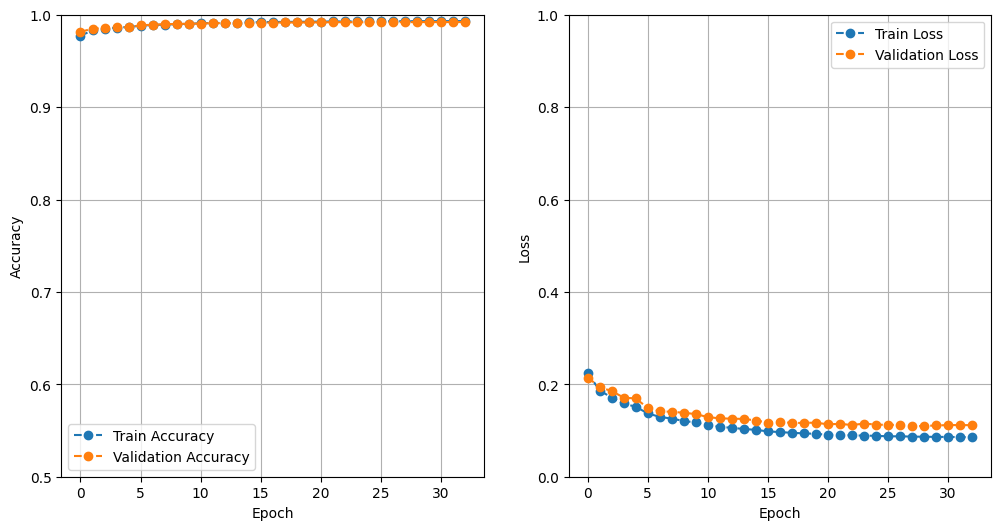

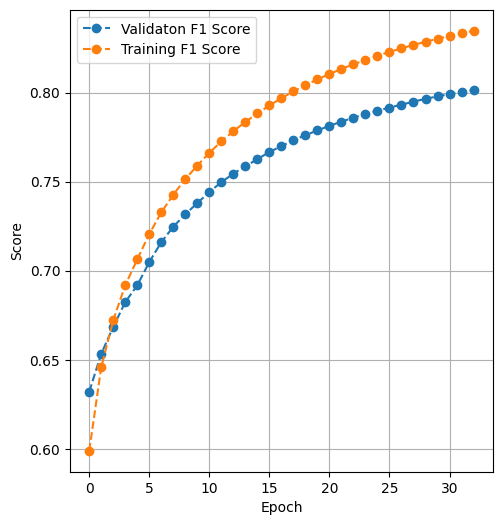

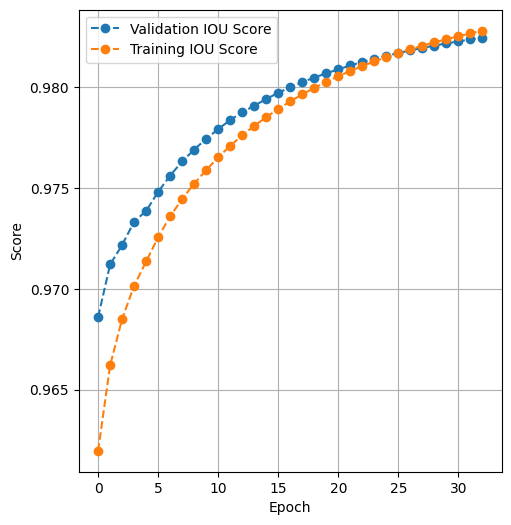

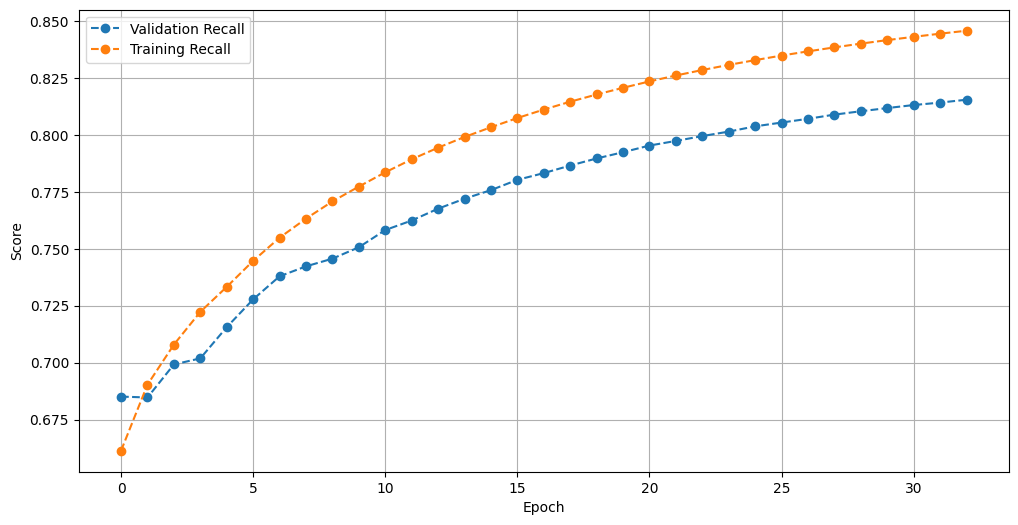

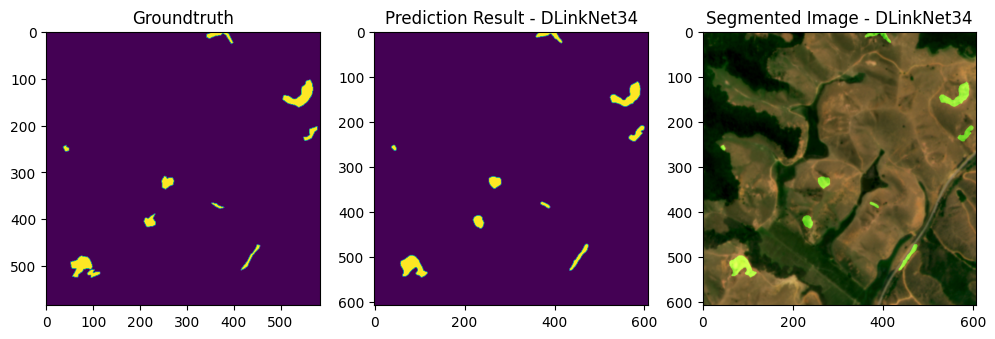

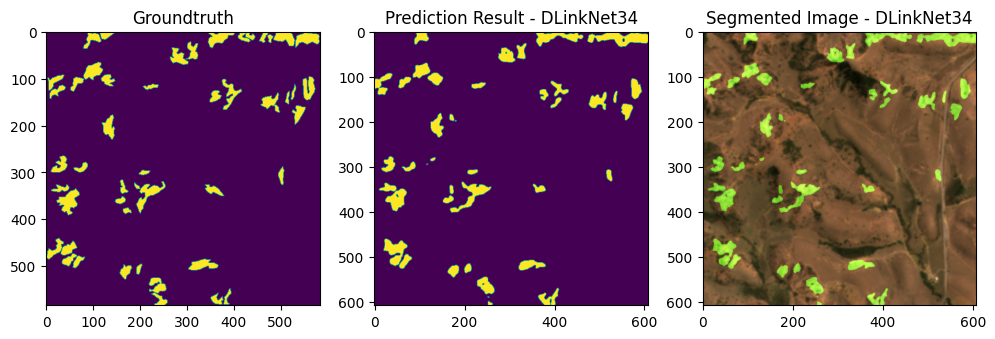

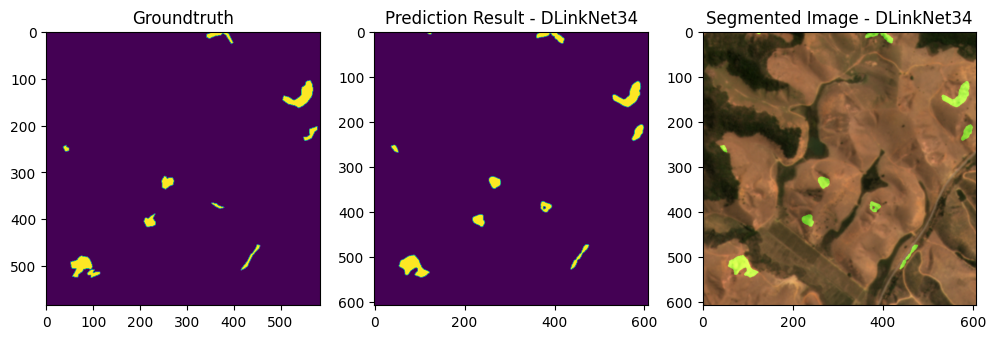

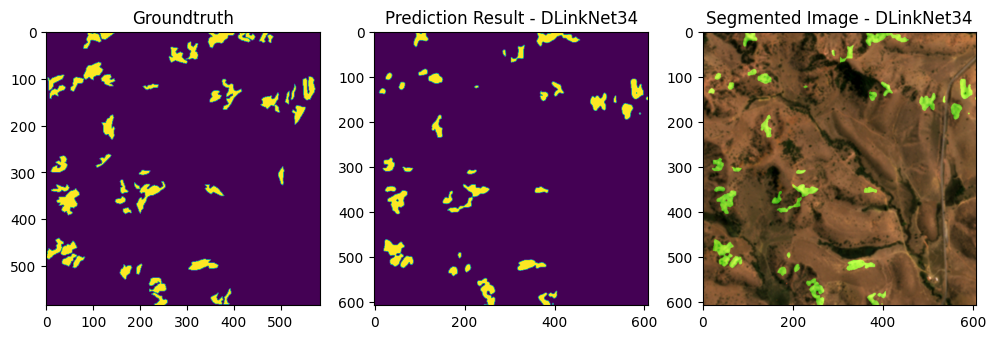

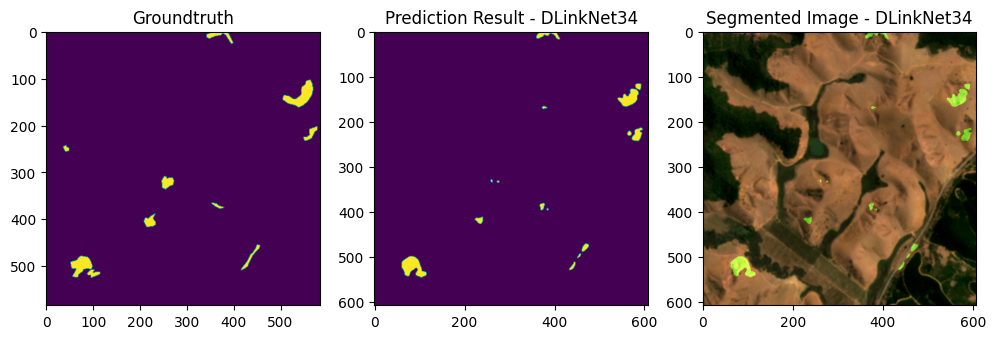

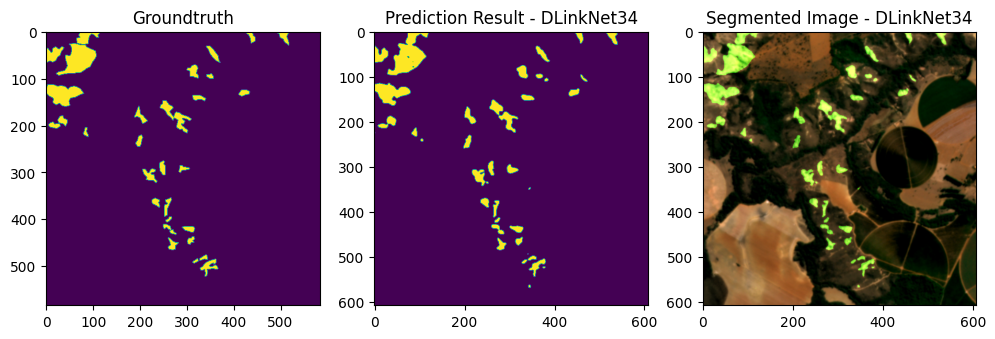

In [ ]:
# %%

if model_training:
    train(
        model,
        images_augmented,
        labels_augmented,
        images_validation,
        labels_validation,
        loss_func=BCEIoULoss(),
        batch_size=2,
        learning_rate=2e-4,
        epochs=100,
        model_validation=model_validation,
        cuda_available=cuda_available,
        path_model=path_model,
        patience=5,
    )

if model_loading:
    # Load the model from your Google Drive or local file system
    checkpoint = torch.load(path_model)
    model.load_state_dict(checkpoint["model_state_dict"])

for aux in range(747, 753):
    test(path_testing, aux, model, cuda_available)